In [460]:
# 1 - Import necessary libraries
import pandas as pd
import os
import random as rd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [461]:
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Desktop\\DATA 602\\Project\\Yahoo_fantasy_basketball_analyzer-master\\Yahoo_fantasy_basketball_analyzer-master\\yahoo_fantasy_basketball_analyzer\\machine_learning\\data\\2018\\player'

In [462]:
files = os.listdir('C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player')
file_list = []
for element in files:
    if element.endswith(".csv"):
        file_list.append(element) 

len(file_list)

530

In [463]:
# choose a random player to analyze
x = rd.randint(0,530)
file_list[x]


'Ivica Zubac.csv'

In [464]:
path = "C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player"
df = pd.read_csv(path+"/"+str(file_list[x]), usecols=["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      59 non-null     object 
 1   FG%     57 non-null     float64
 2   FT%     40 non-null     float64
 3   TRB     59 non-null     int64  
 4   AST     59 non-null     int64  
 5   STL     59 non-null     int64  
 6   BLK     59 non-null     int64  
 7   TOV     59 non-null     int64  
 8   PTS     59 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.3+ KB


In [465]:
# Putting zero(0) value for non-values
df = df.fillna(0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      59 non-null     object 
 1   FG%     59 non-null     float64
 2   FT%     59 non-null     float64
 3   TRB     59 non-null     int64  
 4   AST     59 non-null     int64  
 5   STL     59 non-null     int64  
 6   BLK     59 non-null     int64  
 7   TOV     59 non-null     int64  
 8   PTS     59 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.3+ KB


**Explanation of the abbreviations:**
- MP = Minutes Played
- FG% = Field Goal Percentage 
- FT% = Free Throw Percentage 
- TRB = Total Rebound 
- AST = Assist 
- STL = Steal 
- BLK = Block 
- TOV = Turnover
- PTS = Points

In [466]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,4:43,0.000,0.0,1,0,0,1,0,0
1,2:20,0.000,0.0,2,1,0,0,0,0
2,19:40,0.800,1.0,8,0,1,0,2,9
3,11:12,0.333,1.0,6,1,0,0,1,5
4,1:39,0.000,0.0,2,0,0,0,0,0


In [467]:
df['MP'] = df['MP'].astype(str).str[0:2].str.replace(":","")
# df['MP'].str.split(":")[0][0]


In [468]:
# getting only minutes and removing seconds from MP(minutes played) column
# df['MP'] = df['MP'].astype(str).str[0:2]
df['MP'] = df['MP'].apply(int)
df['MP']

0      4
1      2
2     19
3     11
4      1
5      7
6      3
7      3
8     11
9      6
10     2
11    32
12    32
13    30
14    20
15    19
16    10
17    11
18    18
19     3
20    23
21    14
22    10
23     7
24    28
25    21
26    20
27    20
28    34
29    16
30    17
31    25
32    19
33    23
34    14
35    21
36    21
37    19
38    19
39    17
40    18
41    23
42    13
43    23
44    26
45    22
46    23
47    13
48    18
49    17
50    19
51    20
52    17
53    16
54    21
55    20
56    18
57    20
58    29
Name: MP, dtype: int64

In [469]:
# print(file_list[x])
df

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,4,0.000,0.000,1,0,0,1,0,0
1,2,0.000,0.000,2,1,0,0,0,0
2,19,0.800,1.000,8,0,1,0,2,9
3,11,0.333,1.000,6,1,0,0,1,5
4,1,0.000,0.000,2,0,0,0,0,0
5,7,0.000,0.000,2,0,0,1,1,0
6,3,0.000,0.000,1,0,0,0,0,0
7,3,0.000,0.000,2,0,0,1,0,0
8,11,0.750,0.000,1,0,0,0,0,6
9,6,1.000,0.000,2,1,0,0,0,4


In [470]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,4,0.000,0.0,1,0,0,1,0,0
1,2,0.000,0.0,2,1,0,0,0,0
2,19,0.800,1.0,8,0,1,0,2,9
3,11,0.333,1.0,6,1,0,0,1,5
4,1,0.000,0.0,2,0,0,0,0,0


# Hypothesis 

H0: There is no difference in the accuracy or performance among the models selected

H1: There is a difference in the accuracy or performance among the models selected
- We set our confidence level as 95%. If the Z-score calculated from p-value is smaller than 1.96, we cannot deny H0. However, if it is greater than 1.95, we will deny H0 and accept H1.,

## Linear Regression Model 

Coefficients: 
 [[0.62227493]]
Mean squared error: 10.02
Coefficient of determination: 0.40


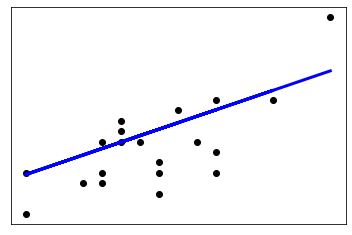

In [471]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining features
df_X = df[["MP"]].to_numpy()

# target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

# Plot outputs 
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

For MP effect on PTS
Coefficients: 
 [[0.62227493]]
Mean squared error: 10.02
Coefficient of determination: 0.40


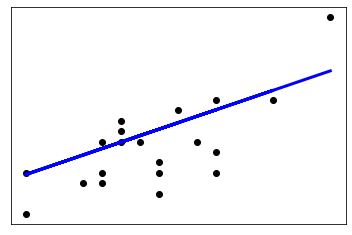

For FG% effect on PTS
Coefficients: 
 [[12.72582291]]
Mean squared error: 17.30
Coefficient of determination: -0.04


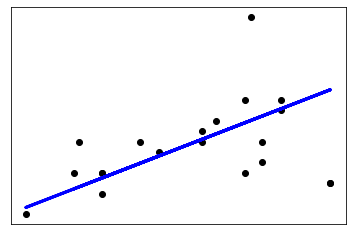

For PTS effect on PTS
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


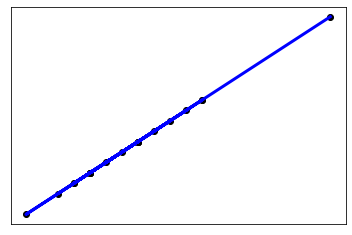

For FT% effect on PTS
Coefficients: 
 [[5.7568755]]
Mean squared error: 15.84
Coefficient of determination: 0.05


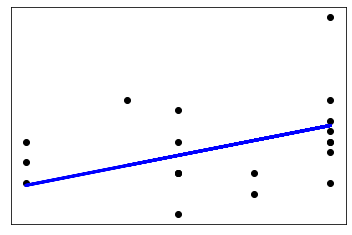

For TRB effect on PTS
Coefficients: 
 [[1.35947931]]
Mean squared error: 31.42
Coefficient of determination: -0.89


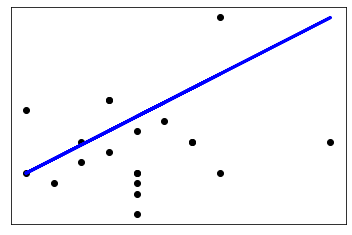

For AST effect on PTS
Coefficients: 
 [[0.73793103]]
Mean squared error: 18.34
Coefficient of determination: -0.10


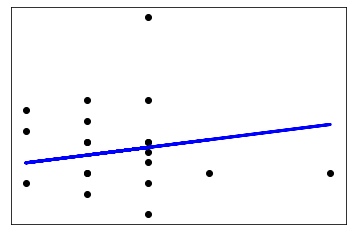

For STL effect on PTS
Coefficients: 
 [[2.06521739]]
Mean squared error: 21.12
Coefficient of determination: -0.27


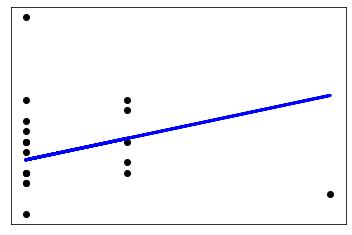

For BLK effect on PTS
Coefficients: 
 [[3.01641266]]
Mean squared error: 20.93
Coefficient of determination: -0.26


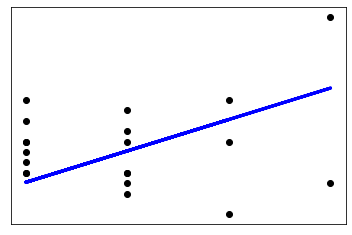

For TOV effect on PTS
Coefficients: 
 [[2.24132492]]
Mean squared error: 14.67
Coefficient of determination: 0.12


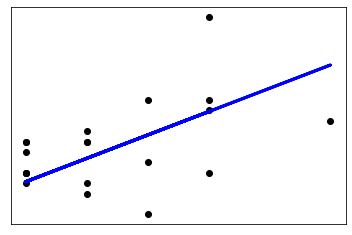

In [472]:
# Checking all features one by one with FOR loop 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = ["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]

for element in features: 
    print("For", element, "effect on PTS")
    # # defining features
    df_X = df[[element]].to_numpy()

    # # target variable
    df_y = df[['PTS']].to_numpy()

    # Split the data into training/testing sets
    df_X_train = df_X[:-20]
    df_X_test = df_X[-20:]

    # Split the targets into training/testing sets
    df_y_train = df_y[:-20]
    df_y_test = df_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_X_train, df_y_train)

    # Make predictions using the testing set
    df_y_pred = regr.predict(df_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print('Mean squared error: %.2f'
         % mean_squared_error(df_y_test, df_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
         % r2_score(df_y_test, df_y_pred))

    # Plot outputs 
    plt.scatter(df_X_test, df_y_test, color='black')
    plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [473]:
# Adding more features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "AST", "TRB"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

df

Coefficients: 
 [[ 0.41719553  5.39879485 -0.11292828  0.36540215]]
Mean squared error: 11.51
Coefficient of determination: 0.31


,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,4,0.000,0.000,1,0,0,1,0,0
1,2,0.000,0.000,2,1,0,0,0,0
2,19,0.800,1.000,8,0,1,0,2,9
3,11,0.333,1.000,6,1,0,0,1,5
4,1,0.000,0.000,2,0,0,0,0,0
5,7,0.000,0.000,2,0,0,1,1,0
6,3,0.000,0.000,1,0,0,0,0,0
7,3,0.000,0.000,2,0,0,1,0,0
8,11,0.750,0.000,1,0,0,0,0,6
9,6,1.000,0.000,2,1,0,0,0,4


In [474]:
# Adding all the features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 0.41662155  5.40610839  2.23254795  0.46818042 -0.38376111 -3.55347154
   0.23382707 -0.24364613]]
Mean squared error: 17.19
Coefficient of determination: -0.03


In [475]:
# Calculating R-squared score, mean absolute error, and mean squared error for linear regression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("For LINEAR REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, df_y_pred), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, df_y_pred), '\n',
      "R-squared score is:", r2_score(df_y_test, df_y_pred))


For LINEAR REGRESSION MODEL 
Mean absolute error is: 3.63024526533642 
 Mean squared error is: 17.19203977840251 
 R-squared score is: -0.032710003207839566


Prediction: [6.02223842] vs. Actual: [7]
Prediction: [12.14635857] vs. Actual: [10]
Prediction: [11.9815199] vs. Actual: [7]
Prediction: [8.82454441] vs. Actual: [7]
Prediction: [10.44935601] vs. Actual: [14]
Prediction: [16.22519388] vs. Actual: [14]
Prediction: [15.6018394] vs. Actual: [10]
Prediction: [13.77628694] vs. Actual: [9]
Prediction: [6.83936361] vs. Actual: [3]
Prediction: [12.69789059] vs. Actual: [12]
Prediction: [15.14927348] vs. Actual: [6]
Prediction: [15.75376272] vs. Actual: [10]
Prediction: [7.40676263] vs. Actual: [8]
Prediction: [5.83823626] vs. Actual: [10]
Prediction: [11.15178466] vs. Actual: [6]
Prediction: [9.06914864] vs. Actual: [13]
Prediction: [1.24717306] vs. Actual: [5]
Prediction: [13.59482633] vs. Actual: [11]
Prediction: [11.46869975] vs. Actual: [7]
Prediction: [19.5735239] vs. Actual: [22]


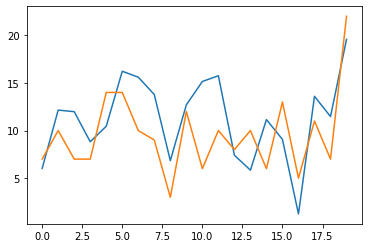

In [476]:
# Printing predicted and actual values

for i in range(len(df_y_test)):
    print("Prediction:", df_y_pred[i], "vs. Actual:", df_y_test[i])

plt.plot(df_y_pred)
plt.plot(df_y_test)

## Statsmodel for Linear Regression

In [477]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [478]:
mod = sm.OLS(df_y, df_X) #describe model
res = mod.fit() #fit model
print(res.summary()) #summarize model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              87.57
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                    4.54e-27
Time:                        14:51:35   Log-Likelihood:                         -143.93
No. Observations:                  59   AIC:                                      303.9
Df Residuals:                      51   BIC:                                      320.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [479]:
res.params

array([ 0.41868156,  2.94077028,  1.23594129,  0.1315062 , -1.08417348,
       -1.62354511,  0.35628456,  0.28803219])

In [480]:
print("R-squared:", res.rsquared)

R-squared: 0.9321402976680176


In [481]:
# Apply Rainbow test for linearity
sm.stats.linear_rainbow(res)

# first number is an F-statistic and that the second is the p-value

(0.7405897312114613, 0.7787422648769725)

- Z-score calculated from our p-value(0.7787) is 1.42. Since it is lower than 1.96, we cannot deny H0. We can say that there is no difference in the accuracy or performance among the models selected.

## Lasso Model

In [482]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# summarize shape
print(df.shape)
# summarize first few lines
print(df.head())

(59, 9)
   MP    FG%  FT%  TRB  AST  STL  BLK  TOV  PTS
0   4  0.000  0.0    1    0    0    1    0    0
1   2  0.000  0.0    2    1    0    0    0    0
2  19  0.800  1.0    8    0    1    0    2    9
3  11  0.333  1.0    6    1    0    0    1    5
4   1  0.000  0.0    2    0    0    0    0    0


In [483]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 2.603 (0.789)


In [484]:
df.tail(10)

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
49,17,1.000,1.00,8,2,0,3,0,6
50,19,0.800,1.00,10,1,0,1,0,10
51,20,0.800,0.00,6,2,1,0,2,8
52,17,0.625,0.00,6,1,1,0,1,10
53,16,1.000,0.00,5,0,0,1,1,6
54,21,0.857,0.50,4,0,1,1,3,13
55,20,0.333,0.75,8,1,3,1,1,5
56,18,0.625,1.00,8,0,0,1,1,11
57,20,0.250,0.75,8,1,0,0,0,7
58,29,0.769,1.00,11,2,0,3,3,22


In [485]:
df_y_test

array([[ 7],
       [10],
       [ 7],
       [ 7],
       [14],
       [14],
       [10],
       [ 9],
       [ 3],
       [12],
       [ 6],
       [10],
       [ 8],
       [10],
       [ 6],
       [13],
       [ 5],
       [11],
       [ 7],
       [22]], dtype=int64)

In [486]:
#define model 
model = Lasso(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
yhat = model.predict(df_X_test)
yhat

array([ 8.84754527,  9.44651112, 12.44134037,  6.45168186, 12.44134037,
       14.23823793, 11.84237452, 12.44134037,  6.45168186,  9.44651112,
        8.84754527, 10.04547697, 10.64444282,  8.84754527,  8.24857942,
       11.24340867, 10.64444282,  9.44651112, 10.64444282, 16.03513548])

Prediction: 8.847545266850597 vs. Actual: [7]
Prediction: 9.446511118013557 vs. Actual: [10]
Prediction: 12.44134037382836 vs. Actual: [7]
Prediction: 6.451681862198755 vs. Actual: [7]
Prediction: 12.44134037382836 vs. Actual: [14]
Prediction: 14.238237927317241 vs. Actual: [14]
Prediction: 11.8423745226654 vs. Actual: [10]
Prediction: 12.44134037382836 vs. Actual: [9]
Prediction: 6.451681862198755 vs. Actual: [3]
Prediction: 9.446511118013557 vs. Actual: [12]
Prediction: 8.847545266850597 vs. Actual: [6]
Prediction: 10.045476969176518 vs. Actual: [10]
Prediction: 10.644442820339478 vs. Actual: [8]
Prediction: 8.847545266850597 vs. Actual: [10]
Prediction: 8.248579415687637 vs. Actual: [6]
Prediction: 11.24340867150244 vs. Actual: [13]
Prediction: 10.644442820339478 vs. Actual: [5]
Prediction: 9.446511118013557 vs. Actual: [11]
Prediction: 10.644442820339478 vs. Actual: [7]
Prediction: 16.035135480806122 vs. Actual: [22]


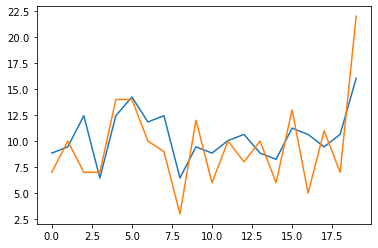

In [487]:
for i in range(len(df_y_test)):
    print("Prediction:", yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(yhat)
plt.plot(df_y_test)

In [488]:
print("For LASSO MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, yhat))

For LASSO MODEL 
Mean absolute error is: 2.4489402715097475 
 Mean squared error is: 8.874726906378871 
 R-squared score is: 0.4669033244403742


## Ridge Regression Model

In [489]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 2.346 (0.713)


In [490]:
data = df.values
X, y = data[:, :-1], data[:, -1]
#define model 
model = Ridge(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
ridge_yhat = model.predict(df_X_test)
ridge_yhat

array([ 5.23768091,  9.14943264,  9.3916605 ,  7.04459884, 11.97836741,
       15.18398601, 11.53115009, 11.49056122,  5.79806813, 12.23405966,
       11.58804027, 12.20683431,  8.3997341 ,  6.80812991, 10.27776504,
       12.00145604,  6.05087455, 11.94689398,  9.65859717, 18.02883572])

Prediction: 5.2376809144368615 vs. Actual: [7]
Prediction: 9.149432638255531 vs. Actual: [10]
Prediction: 9.391660498829157 vs. Actual: [7]
Prediction: 7.044598839064507 vs. Actual: [7]
Prediction: 11.978367410509422 vs. Actual: [14]
Prediction: 15.183986011066741 vs. Actual: [14]
Prediction: 11.53115009292517 vs. Actual: [10]
Prediction: 11.49056122022086 vs. Actual: [9]
Prediction: 5.798068131779155 vs. Actual: [3]
Prediction: 12.234059662347573 vs. Actual: [12]
Prediction: 11.588040269239665 vs. Actual: [6]
Prediction: 12.206834313245114 vs. Actual: [10]
Prediction: 8.399734098844208 vs. Actual: [8]
Prediction: 6.8081299114285 vs. Actual: [10]
Prediction: 10.277765037412578 vs. Actual: [6]
Prediction: 12.001456035739256 vs. Actual: [13]
Prediction: 6.050874546323138 vs. Actual: [5]
Prediction: 11.946893979114169 vs. Actual: [11]
Prediction: 9.658597172333684 vs. Actual: [7]
Prediction: 18.028835720354294 vs. Actual: [22]


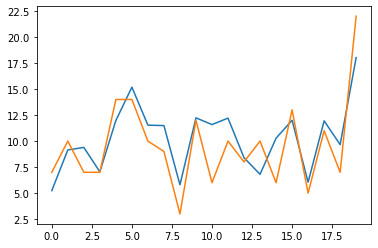

In [491]:
for i in range(len(df_y_test)):
    print("Prediction:", ridge_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(ridge_yhat)
plt.plot(df_y_test)

In [492]:
print("For RIDGE MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, ridge_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, ridge_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, ridge_yhat))

For RIDGE MODEL 
Mean absolute error is: 2.029946062101093 
 Mean squared error is: 6.102554814157324 
 R-squared score is: 0.6334251500731447


## Random Forest Model

In [493]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


- The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [494]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

data = df.values
X, y = data[:, :-1], data[:, -1]
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 2.291 (1.078)


In [495]:
# Making predictions
# fit the model on the whole dataset
model.fit(X, y)

# putting new row from test dataset
random_yhat = model.predict(df_X_test)
random_yhat

array([ 7.2 ,  9.86,  8.54,  7.32, 13.74, 14.3 , 10.13, 10.19,  4.24,
       10.9 ,  8.13, 10.26,  8.71,  8.88,  7.55, 13.73,  6.05, 10.66,
        7.01, 20.39])

Prediction: 7.2 vs. Actual: [7]
Prediction: 9.86 vs. Actual: [10]
Prediction: 8.54 vs. Actual: [7]
Prediction: 7.32 vs. Actual: [7]
Prediction: 13.74 vs. Actual: [14]
Prediction: 14.3 vs. Actual: [14]
Prediction: 10.13 vs. Actual: [10]
Prediction: 10.19 vs. Actual: [9]
Prediction: 4.24 vs. Actual: [3]
Prediction: 10.9 vs. Actual: [12]
Prediction: 8.13 vs. Actual: [6]
Prediction: 10.26 vs. Actual: [10]
Prediction: 8.71 vs. Actual: [8]
Prediction: 8.88 vs. Actual: [10]
Prediction: 7.55 vs. Actual: [6]
Prediction: 13.73 vs. Actual: [13]
Prediction: 6.05 vs. Actual: [5]
Prediction: 10.66 vs. Actual: [11]
Prediction: 7.01 vs. Actual: [7]
Prediction: 20.39 vs. Actual: [22]


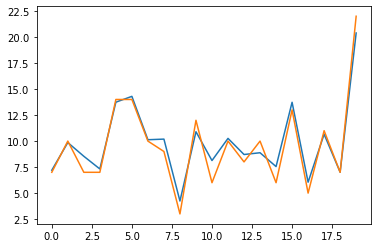

In [496]:
for i in range(len(df_y_test)):
    print("Prediction:", random_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(random_yhat)
plt.plot(df_y_test)

In [497]:
print("For RANDOM FOREST MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, random_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, random_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, random_yhat))

For RANDOM FOREST MODEL 
Mean absolute error is: 0.7965000000000001 
 Mean squared error is: 0.9990249999999999 
 R-squared score is: 0.9399894879110977
